<a href="https://colab.research.google.com/github/Kuizinass/AI-Projects/blob/main/Image_classification_project_20_models_improving_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Classification using Convolutional Neural Networks

In [78]:
# Let's set up tensorflow and print the current version
import tensorflow as tf
print(tf.__version__)

2.17.0


## What is image classification?

Why would we need to use Deep Learning for image classification?

Imagine you're building a system that can automatically sort through thousands of holiday photos and group them into categories, like "beach" and "mountain", "city" and "forest". That is image classification in action.

## Dataset

To build image classification models, we need a dataset. One of the most popular datasets for begginers is the CIFAR-10 dataset. It consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.

## Model Architecture

For image classification, a Convolutional Neural Network (CNN) is great choice. CNNs are designed to automatically and adaptively learn features from spatial hierarchies of features from input images. Let's look at simple CNN architecture:

* **Input Layer**: The raw pixel values of the image
* **Convolutional Layers**: Apply a series of filters to detect features like edges, textures, and patterns
* **Pooling Layers**: Reduce the spatial dimensions of the feature maps, retaining the most important information.
* **Fully Connected Layers**: Combine the features to make the final classification.

## Here is a sample CNN Architecture:

* **Convolution Layer 1**: 32 filters, 3x3 kernel size and ReLu activation
* **Max Pooling Layer 1**: 2x2 pooling window
* **Convolution Layer 2**: 64 filters, 3x3 kernel size and ReLu activation
* **Max Pooling Layer 2**: 2x2 pooling window
* **Fully Connected Layer**: 128 neurons and ReLu activation
* **Output Layer**: 10 neurons for the 10 classes and softmax activation

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4055 - loss: 1.6324 - val_accuracy: 0.5828 - val_loss: 1.1900
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6136 - loss: 1.0936 - val_accuracy: 0.6400 - val_loss: 1.0402
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6791 - loss: 0.9200 - val_accuracy: 0.6675 - val_loss: 0.9605
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7243 - loss: 0.7944 - val_accuracy: 0.6652 - val_loss: 0.9621
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7597 - loss: 0.6868 - val_accuracy: 0.6952 - val_loss: 0.9040
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7856 - loss: 0.6100 - val_accuracy: 0.6848 - val_loss: 0.9335
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8130 - loss: 0.5339 - val_accuracy: 0.6918 - val_loss: 0.9711
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8389 - loss: 0.457

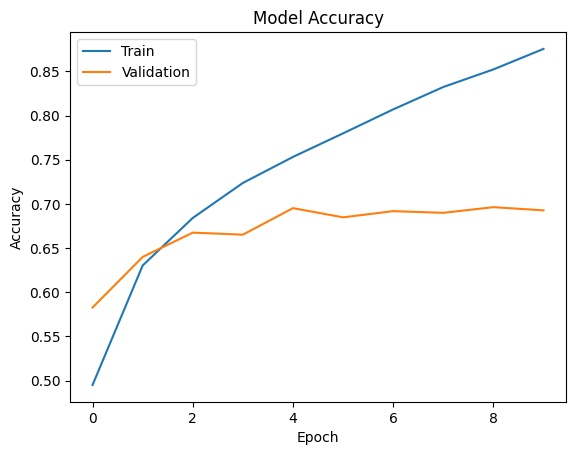

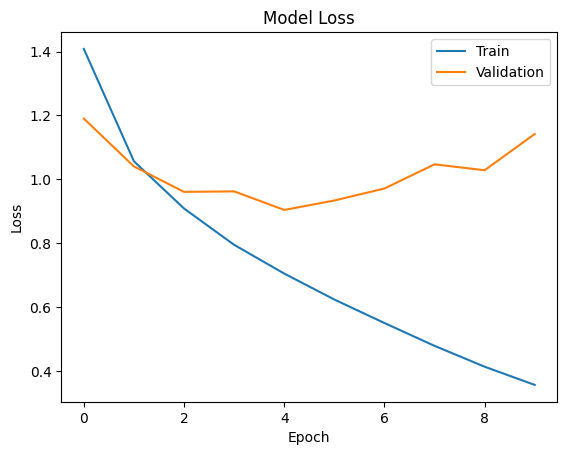

In [79]:
# Let's build the actual model now
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [80]:
model.summary()

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_124 (Conv2D)                  │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_93 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_125 (Conv2D)                  │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_94 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_42 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 947,168 (3.61 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 631,446 (2.41 MB)

# As we can see per above stats we have achieved 69.27% validation accuracy, it is important to emphasize in Deep Learning that we must experiment and experiment to see how we can improve the accuracy, by adding/removing layers, changing the size of the hidden layers, chaging learning rate or even training for longer

## Let's build model 1

The goal here is increase the Dense layer and see how that changes the accuracy

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4165 - loss: 1.6102 - val_accuracy: 0.5777 - val_loss: 1.1857
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6319 - loss: 1.0432 - val_accuracy: 0.6659 - val_loss: 0.9508
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6960 - loss: 0.8626 - val_accuracy: 0.6930 - val_loss: 0.8983
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7462 - loss: 0.7263 - val_accuracy: 0.6977 - val_loss: 0.8749
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7834 - loss: 0.6252 - val_accuracy: 0.7045 - val_loss: 0.8793
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8216 - loss: 0.5167 - val_accuracy: 0.6960 - val_loss: 0.9207
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8577 - loss: 0.4132 - val_accuracy: 0.7067 - val_loss: 0.9386
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8879 - loss: 0.3269 -

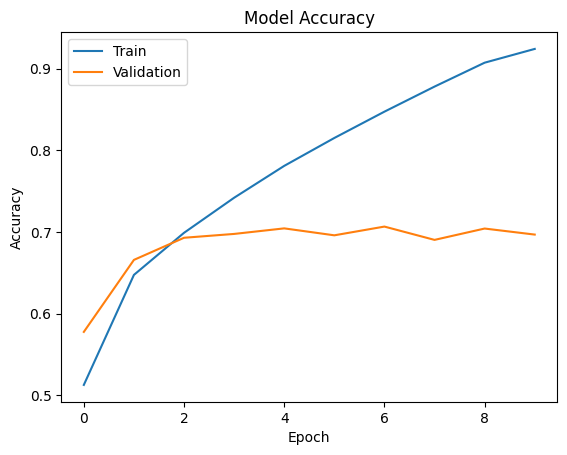

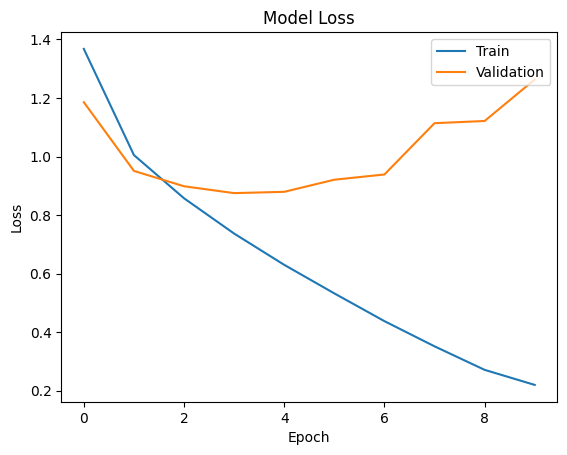

In [81]:
# Let's build the actual model now
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model_1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_1 = model_1.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model_1.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy values
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [82]:
model_1.summary()

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_126 (Conv2D)                  │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_95 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_127 (Conv2D)                  │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_96 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_43 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,836,128 (7.00 MB)

 Trainable params: 612,042 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,224,086 (4.67 MB)

# As we can the acccuracy has not improved by increasing the Dense layer to 256, now let's try and experiment going the other and decreae dense layer to half the original size to 64

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3914 - loss: 1.6726 - val_accuracy: 0.5501 - val_loss: 1.2701
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6022 - loss: 1.1257 - val_accuracy: 0.6266 - val_loss: 1.0742
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6564 - loss: 0.9801 - val_accuracy: 0.6552 - val_loss: 0.9899
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6889 - loss: 0.8964 - val_accuracy: 0.6667 - val_loss: 0.9687
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7147 - loss: 0.8249 - val_accuracy: 0.6933 - val_loss: 0.9002
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7366 - loss: 0.7555 - val_accuracy: 0.6932 - val_loss: 0.9118
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7543 - loss: 0.7060 - val_accuracy: 0.6956 - val_loss: 0.9004
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7716 - loss: 0.6546 

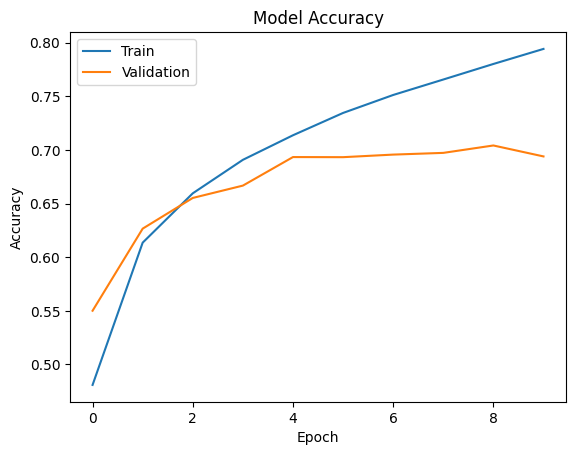

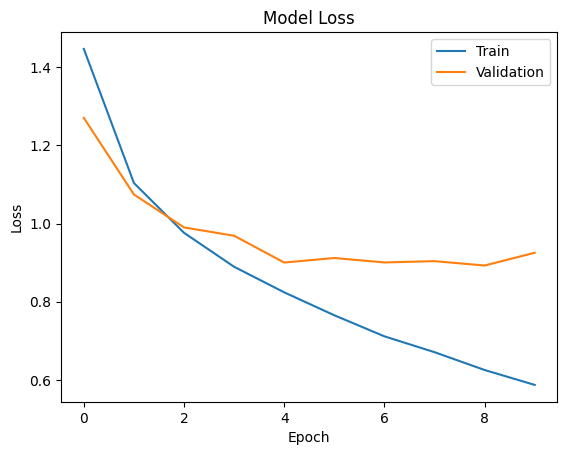

In [83]:
# Let's build model 2
model_2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_2 = model_2.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model_2.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy values
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [84]:
model_2.summary()

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_128 (Conv2D)                  │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_97 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_129 (Conv2D)                  │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_98 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_44 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 502,688 (1.92 MB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 335,126 (1.28 MB)

### As we can validation accuracy has decreased quite tremendously, let's try the last dense layer with 512, then we can safely assume which Dense layer is the best and try different experiment options

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4291 - loss: 1.5765 - val_accuracy: 0.6124 - val_loss: 1.1077
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6444 - loss: 1.0117 - val_accuracy: 0.6782 - val_loss: 0.9375
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7196 - loss: 0.8085 - val_accuracy: 0.6914 - val_loss: 0.8839
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7739 - loss: 0.6433 - val_accuracy: 0.6970 - val_loss: 0.9102
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8271 - loss: 0.5019 - val_accuracy: 0.6999 - val_loss: 0.9205
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8708 - loss: 0.3738 - val_accuracy: 0.7225 - val_loss: 0.9197
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9125 - loss: 0.2576 - val_accuracy: 0.7077 - val_loss: 1.0495
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9413 - loss: 0.1790 - 

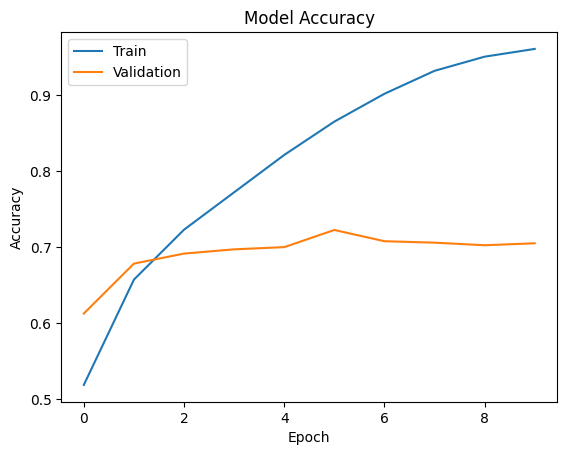

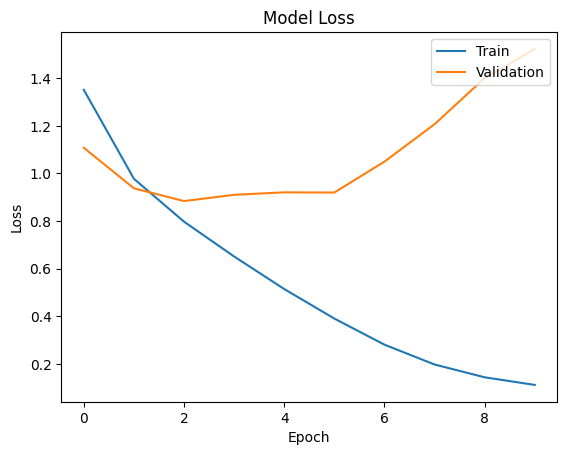

In [85]:
# Let's build model 3
model_3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_3 = model_3.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model_3.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy values
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [86]:
# Let's have a look at the model summary
model_3.summary()

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_130 (Conv2D)                  │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_99 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_131 (Conv2D)                  │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_100 (MaxPooling2D)     │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_45 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,614,048 (13.79 MB)

 Trainable params: 1,204,682 (4.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,409,366 (9.19 MB)

### So seems by increase the dense layer we have improved the accuracy a little, this happens due to having more parameters and more trainable parameters, let's do one last experiment and try doubling the denes layer again to 1024

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4246 - loss: 1.5789 - val_accuracy: 0.6152 - val_loss: 1.1022
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6440 - loss: 1.0000 - val_accuracy: 0.6544 - val_loss: 0.9962
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7319 - loss: 0.7757 - val_accuracy: 0.6970 - val_loss: 0.8915
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7891 - loss: 0.6009 - val_accuracy: 0.7070 - val_loss: 0.9009
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8569 - loss: 0.4152 - val_accuracy: 0.6951 - val_loss: 0.9643
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9071 - loss: 0.2722 - val_accuracy: 0.7045 - val_loss: 1.0720
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9444 - loss: 0.1688 - val_accuracy: 0.7049 - val_loss: 1.3032
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9665 - loss: 0.1056 -

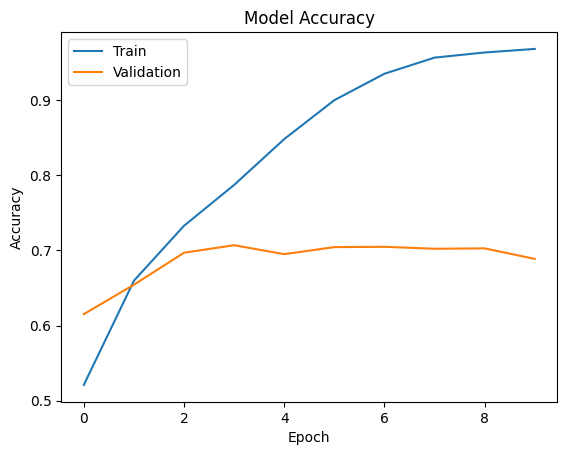

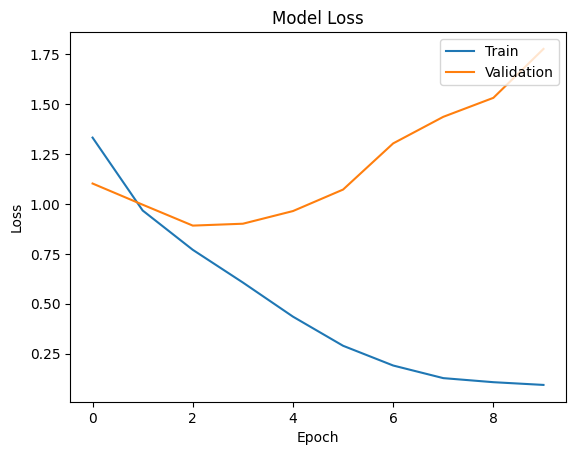

In [87]:
# Let's build model 4
model_4 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_4 = model_4.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model_4.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy values
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [88]:
# Let's review the summary
model_4.summary()

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_132 (Conv2D)                  │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_101 (MaxPooling2D)     │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_133 (Conv2D)                  │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_102 (MaxPooling2D)     │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_46 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 1024)                │       2,360,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,169,888 (27.35 MB)

 Trainable params: 2,389,962 (9.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,779,926 (18.23 MB)

### So by the looks of it, the model 4 Dense layer double was a step too far. Let's stick with Dense layer of 512 and if increasing Convolutional layers will yield results

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4097 - loss: 1.6153 - val_accuracy: 0.6058 - val_loss: 1.1047
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6288 - loss: 1.0540 - val_accuracy: 0.6659 - val_loss: 0.9606
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7028 - loss: 0.8532 - val_accuracy: 0.6903 - val_loss: 0.8992
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7514 - loss: 0.7076 - val_accuracy: 0.6945 - val_loss: 0.8983
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8011 - loss: 0.5704 - val_accuracy: 0.7107 - val_loss: 0.8842
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8425 - loss: 0.4498 - val_accuracy: 0.7135 - val_loss: 0.9216
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8834 - loss: 0.3373 - val_accuracy: 0.7079 - val_loss: 1.0138
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9149 - loss: 0.2488 

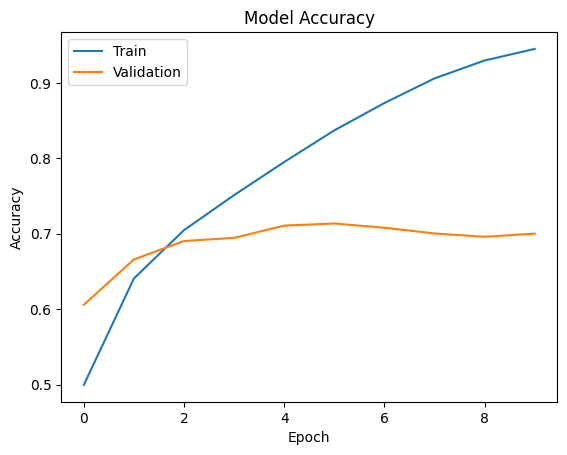

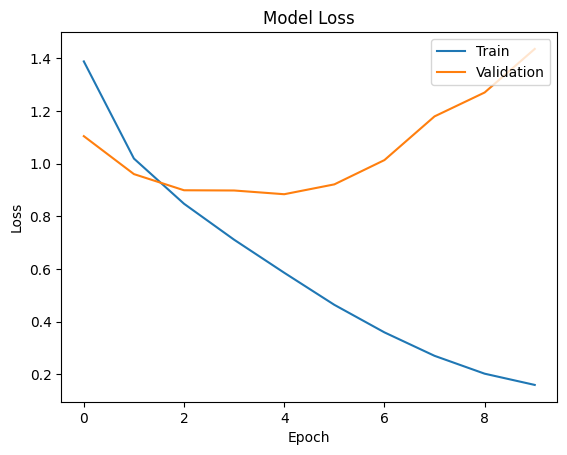

In [89]:
# Let's build model 5
model_5 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_5 = model_5.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model_5.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy values
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [90]:
# Let's have a look at the summary
model_5.summary()

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_134 (Conv2D)                  │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_103 (MaxPooling2D)     │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_135 (Conv2D)                  │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_104 (MaxPooling2D)     │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_47 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,672,032 (14.01 MB)

 Trainable params: 1,224,010 (4.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,448,022 (9.34 MB)

### Looks like model 5 and the increase in the first convolutional layer have not yielded much improved results, let's try increasing the second convolutional layers and see how that changes the accuracy

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4109 - loss: 1.6302 - val_accuracy: 0.6108 - val_loss: 1.1081
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6447 - loss: 1.0072 - val_accuracy: 0.6796 - val_loss: 0.9175
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7195 - loss: 0.8057 - val_accuracy: 0.7026 - val_loss: 0.8632
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7749 - loss: 0.6410 - val_accuracy: 0.6993 - val_loss: 0.8954
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8253 - loss: 0.5012 - val_accuracy: 0.7105 - val_loss: 0.9096
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8726 - loss: 0.3697 - val_accuracy: 0.7134 - val_loss: 1.0046
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9096 - loss: 0.2628 - val_accuracy: 0.7103 - val_loss: 1.0724
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9434 - loss: 0.17

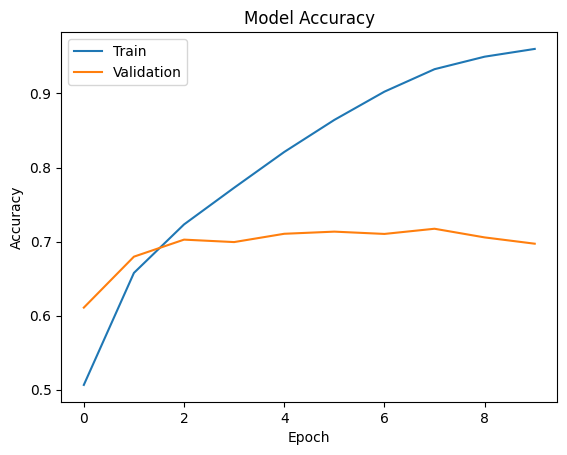

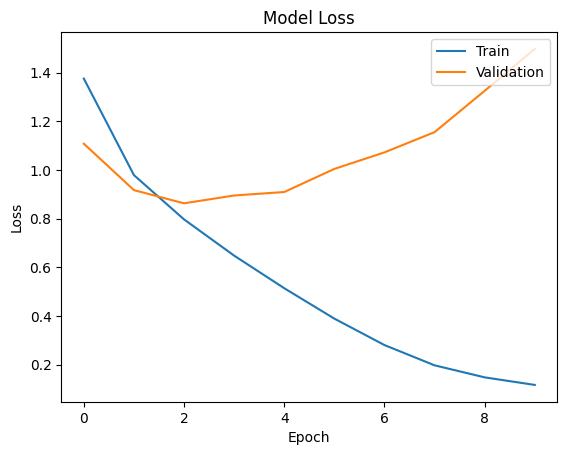

In [91]:
# Let's build model 6
model_6 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_6 = model_6.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model_6.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy values
plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [92]:
# Let's have a look at the sumamry
model_6.summary()

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_136 (Conv2D)                  │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_105 (MaxPooling2D)     │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_137 (Conv2D)                  │ (None, 13, 13, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_106 (MaxPooling2D)     │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_48 (Flatten)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,208,480 (27.50 MB)

 Trainable params: 2,402,826 (9.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,805,654 (18.33 MB)

### Looks like our model is overfitting, what we could do it is introduce dropout layers to prevent model from memorizinf features and see how that changes the model

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4366 - loss: 1.5612 - val_accuracy: 0.6312 - val_loss: 1.0562
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6407 - loss: 1.0084 - val_accuracy: 0.6645 - val_loss: 0.9910
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7160 - loss: 0.8080 - val_accuracy: 0.7003 - val_loss: 0.8682
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7730 - loss: 0.6461 - val_accuracy: 0.7255 - val_loss: 0.8103
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8236 - loss: 0.5077 - val_accuracy: 0.7199 - val_loss: 0.8699
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8668 - loss: 0.3784 - val_accuracy: 0.7219 - val_loss: 0.8710
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9051 - loss: 0.2787 - val_accuracy: 0.7222 - val_loss: 0.9478
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9272 - loss: 0.2181

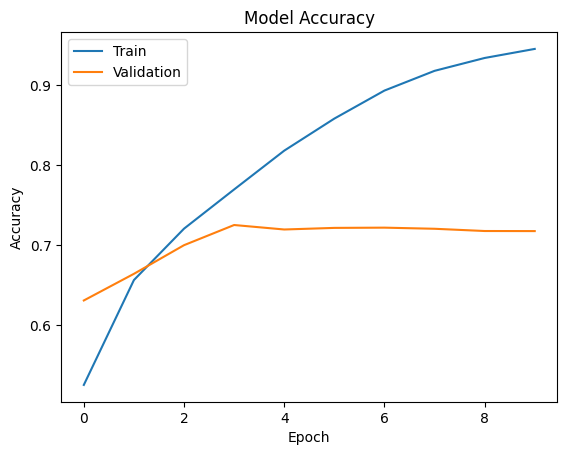

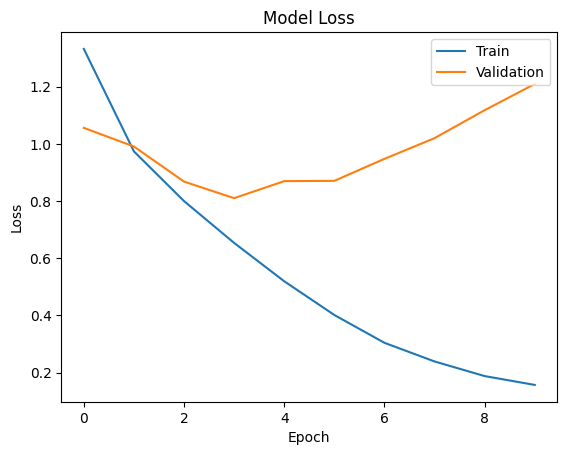

In [93]:
# Let's build model 7
model_7 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_7.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_7 = model_7.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model_7.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy values
plt.plot(history_7.history['accuracy'])
plt.plot(history_7.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [94]:
# Let's have a look at the summary
model_7.summary()

Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_138 (Conv2D)                  │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_107 (MaxPooling2D)     │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_139 (Conv2D)                  │ (None, 13, 13, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_108 (MaxPooling2D)     │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_49 (Flatten)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,208,480 (27.50 MB)

 Trainable params: 2,402,826 (9.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,805,654 (18.33 MB)

### Looks like the model 7 is the best model so far, and dropout rate helped us, what if we increased dropout rate by another 10% will that push our accuracy even further? Let's try

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.4291 - loss: 1.5802 - val_accuracy: 0.6222 - val_loss: 1.0736
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.6384 - loss: 1.0216 - val_accuracy: 0.6910 - val_loss: 0.8966
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7101 - loss: 0.8358 - val_accuracy: 0.6880 - val_loss: 0.8915
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7563 - loss: 0.6900 - val_accuracy: 0.7186 - val_loss: 0.8166
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7994 - loss: 0.5704 - val_accuracy: 0.7258 - val_loss: 0.8054
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8396 - loss: 0.4662 - val_accuracy: 0.7197 - val_loss: 0.8461
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8716 - loss: 0.3720 - val_accuracy: 0.7251 - val_loss: 0.8914
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8960 - loss: 0.298

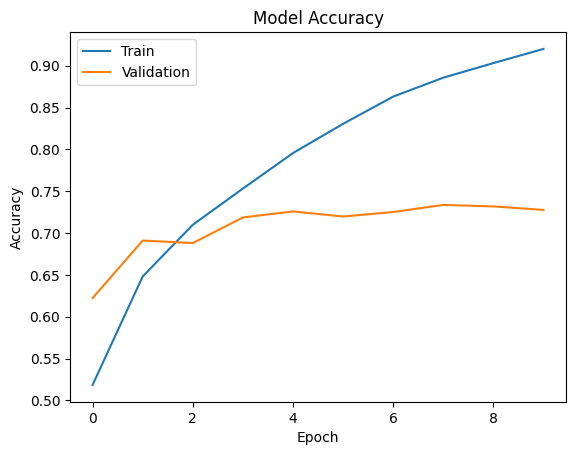

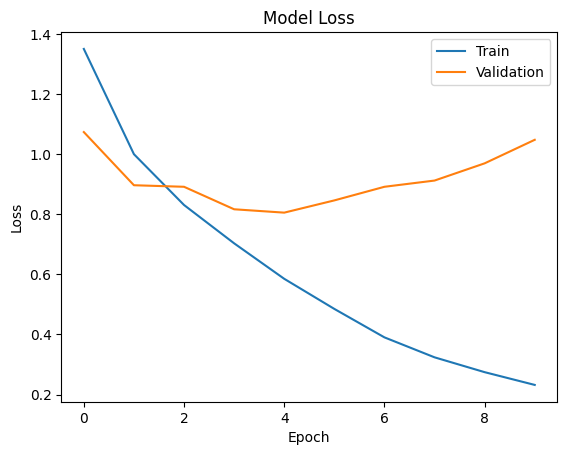

In [95]:
# Let's build model 8
model_8 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_8.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_8 = model_8.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model_8.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy values
plt.plot(history_8.history['accuracy'])
plt.plot(history_8.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history_8.history['loss'])
plt.plot(history_8.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [96]:
# Let's have a look at the model 8 summary
model_8.summary()

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_140 (Conv2D)                  │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_109 (MaxPooling2D)     │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_141 (Conv2D)                  │ (None, 13, 13, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_110 (MaxPooling2D)     │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_50 (Flatten)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,208,480 (27.50 MB)

 Trainable params: 2,402,826 (9.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,805,654 (18.33 MB)

### Woohoo we have again improved the model, how about we push the limits on the dropout to 50% and see if that completely eliminates overfitting as we still have some signs of it

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4079 - loss: 1.6262 - val_accuracy: 0.6083 - val_loss: 1.0995
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6043 - loss: 1.1151 - val_accuracy: 0.6689 - val_loss: 0.9675
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6657 - loss: 0.9543 - val_accuracy: 0.6992 - val_loss: 0.8816
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7073 - loss: 0.8349 - val_accuracy: 0.7221 - val_loss: 0.8154
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7430 - loss: 0.7345 - val_accuracy: 0.7257 - val_loss: 0.8075
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7731 - loss: 0.6495 - val_accuracy: 0.7390 - val_loss: 0.7788
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8003 - loss: 0.5661 - val_accuracy: 0.7405 - val_loss: 0.7841
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8219 - loss: 0.5112

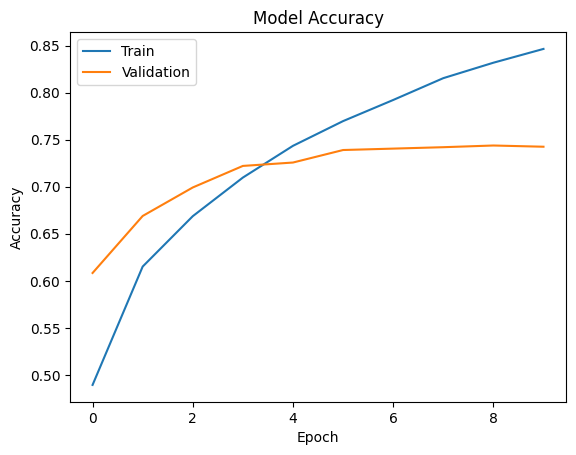

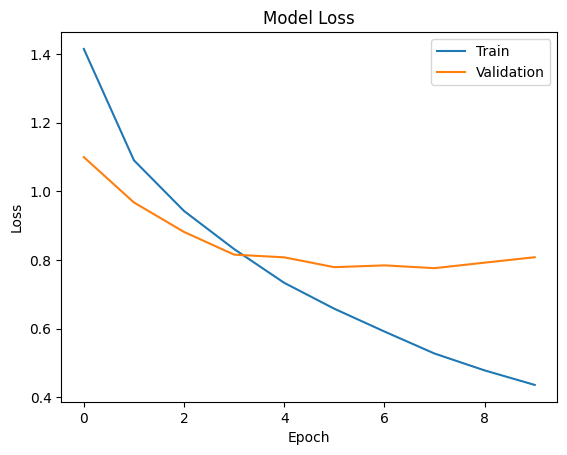

In [97]:
# Let's build model 9
model_9 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_9.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_9 = model_9.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model_9.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy values
plt.plot(history_9.history['accuracy'])
plt.plot(history_9.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [98]:
# Let's explore the summary
model_9.summary()

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_142 (Conv2D)                  │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_111 (MaxPooling2D)     │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_143 (Conv2D)                  │ (None, 13, 13, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_112 (MaxPooling2D)     │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_51 (Flatten)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,208,480 (27.50 MB)

 Trainable params: 2,402,826 (9.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,805,654 (18.33 MB)

### Looks like this is as far as we can take to improve the dropout and achieve the best accuracy. What else you might ask we can do to improve our models? We can add more layers, we can simply layers or play with learning rate. Let's explokre the learning rate next, do you know what is the default Adam learning rate? It's 0.001

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3179 - loss: 1.8569 - val_accuracy: 0.4709 - val_loss: 1.4816
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.4511 - loss: 1.5300 - val_accuracy: 0.4828 - val_loss: 1.4405
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4918 - loss: 1.4323 - val_accuracy: 0.5277 - val_loss: 1.3455
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5038 - loss: 1.3907 - val_accuracy: 0.5408 - val_loss: 1.3128
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5151 - loss: 1.3609 - val_accuracy: 0.5257 - val_loss: 1.3366
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5237 - loss: 1.3456 - val_accuracy: 0.5754 - val_loss: 1.2316
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5406 - loss: 1.3098 - val_accuracy: 0.5659 - val_loss: 1.2217
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5462 - loss: 1.2990 

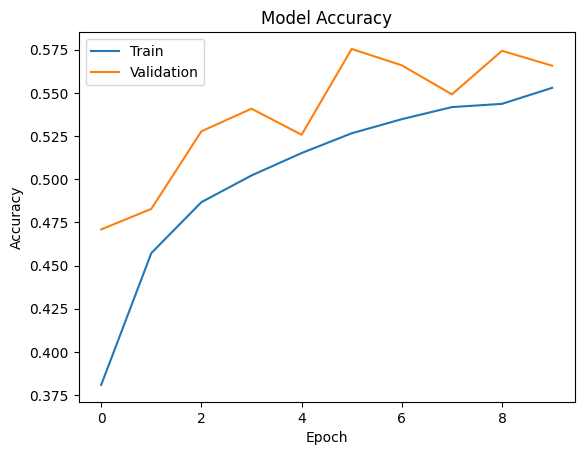

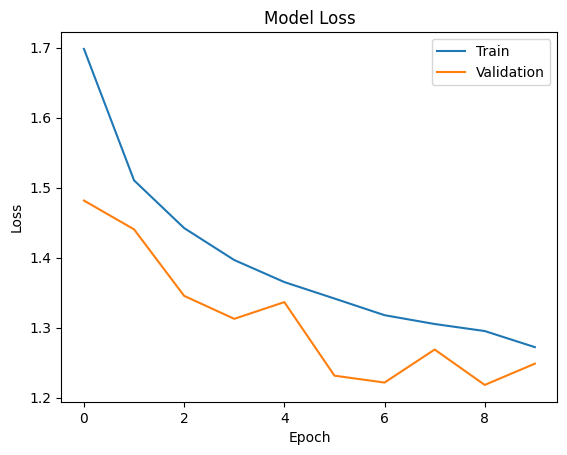

In [99]:
# Let's build model 10
model_10 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_10.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_10 = model_10.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model_10.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy values
plt.plot(history_10.history['accuracy'])
plt.plot(history_10.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history_10.history['loss'])
plt.plot(history_10.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [100]:
# Let's have a look at the model summary
model_10.summary()

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_144 (Conv2D)                  │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_113 (MaxPooling2D)     │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_145 (Conv2D)                  │ (None, 13, 13, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_114 (MaxPooling2D)     │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_52 (Flatten)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,208,480 (27.50 MB)

 Trainable params: 2,402,826 (9.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,805,654 (18.33 MB)

### As we can see from results the accuracy have deteriorated by quite a margin, so increasing learning rate did not help in this instance, that is part of the experimentation, to find out what works and what does not. One thing to note here that Adam is great at using variable learning rates, but we can also try SGD - stochastic gradient descent as optimizer and see how does that influence our model

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1951 - loss: 2.1749 - val_accuracy: 0.3839 - val_loss: 1.7348
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3967 - loss: 1.6875 - val_accuracy: 0.4445 - val_loss: 1.5516
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4616 - loss: 1.4937 - val_accuracy: 0.5042 - val_loss: 1.4036
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5013 - loss: 1.3999 - val_accuracy: 0.5429 - val_loss: 1.2947
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5321 - loss: 1.3204 - val_accuracy: 0.5484 - val_loss: 1.2828
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5550 - loss: 1.2589 - val_accuracy: 0.5699 - val_loss: 1.2149
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5750 - loss: 1.2068 - val_accuracy: 0.6125 - val_loss: 1.1216
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5963 - loss: 1.1452 

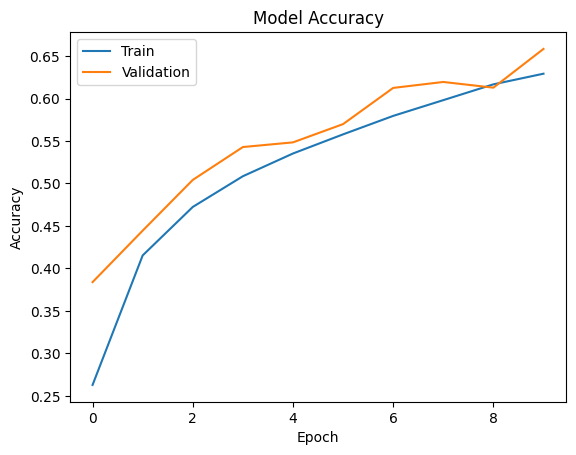

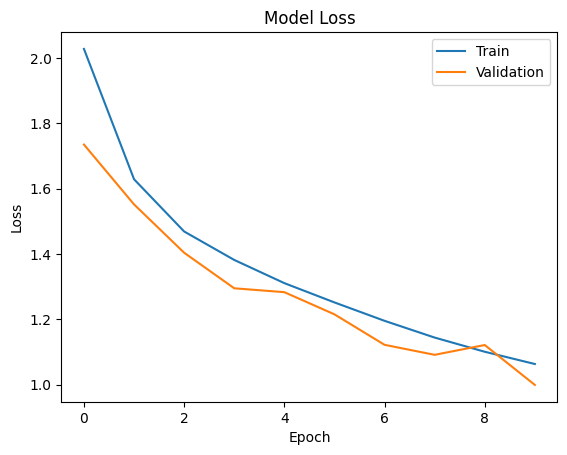

In [101]:
# Let's build model 11
model_11 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_11.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_11 = model_11.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model_11.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy values
plt.plot(history_11.history['accuracy'])
plt.plot(history_11.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history_11.history['loss'])
plt.plot(history_11.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### As we can see the accuracy was not great switching to SGD, let's a few other techinques that could help improve the model, like gradient clipping and weight decay. Gradient Clipping is a technique used to stabilize the training of neural networks. It was originally invented to solve the problem of vanishing and exploding gradients in training recurrent neural networks, but it has also shown to be useful for transformers and convolutional neural networks. Weight decay is a regularization technique used in training neural networks that helps prevent overfitting. By penalizing larger weights, it encourages the model to develop a simpler, more generalizable structure. This tends to lead to a model that performs better on new, unseen data

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4071 - loss: 1.6270 - val_accuracy: 0.6112 - val_loss: 1.1039
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6088 - loss: 1.1185 - val_accuracy: 0.6650 - val_loss: 0.9527
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6659 - loss: 0.9417 - val_accuracy: 0.6987 - val_loss: 0.8753
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7108 - loss: 0.8256 - val_accuracy: 0.7148 - val_loss: 0.8309
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7439 - loss: 0.7264 - val_accuracy: 0.7283 - val_loss: 0.7793
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7733 - loss: 0.6438 - val_accuracy: 0.7200 - val_loss: 0.8321
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7949 - loss: 0.5803 - val_accuracy: 0.7313 - val_loss: 0.7975
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8166 - loss: 0.5241 

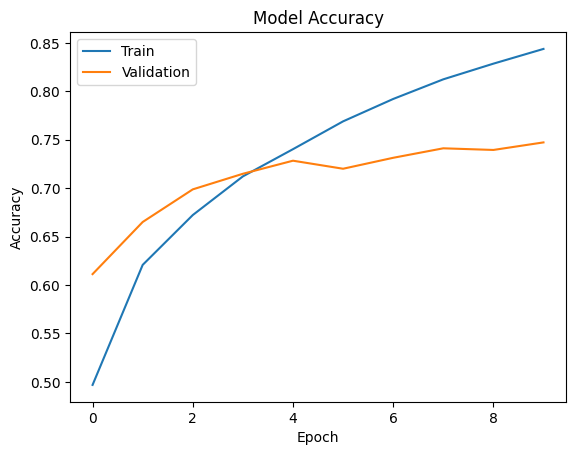

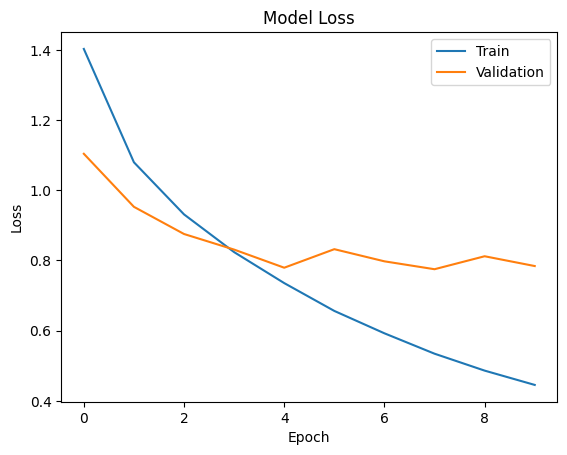

In [102]:
# Let's build model 12
model_12 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), use_bias=True),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', use_bias=True),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_12.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=0.5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_12 = model_12.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model_12.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy values
plt.plot(history_12.history['accuracy'])
plt.plot(history_12.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history_12.history['loss'])
plt.plot(history_12.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### As you can above we have just added use_bias parameter which allowed to increase our model accuracy to nearly 74% but we can still do better. Let's a couple more layers and see how that will impact our model

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3981 - loss: 1.6507 - val_accuracy: 0.6143 - val_loss: 1.1175
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5964 - loss: 1.1460 - val_accuracy: 0.5868 - val_loss: 1.1434
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6506 - loss: 0.9922 - val_accuracy: 0.6905 - val_loss: 0.8919
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6947 - loss: 0.8653 - val_accuracy: 0.7056 - val_loss: 0.8588
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7323 - loss: 0.7722 - val_accuracy: 0.7281 - val_loss: 0.8100
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7523 - loss: 0.7036 - val_accuracy: 0.7335 - val_loss: 0.7837
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7790 - loss: 0.6283 - val_accuracy: 0.7279 - val_loss: 0.7833
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7996 - loss: 0.576

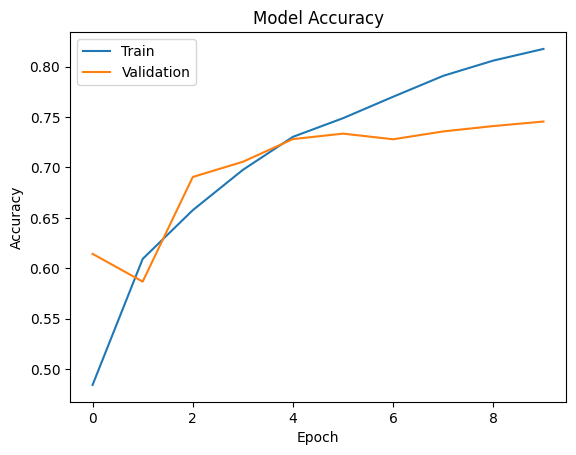

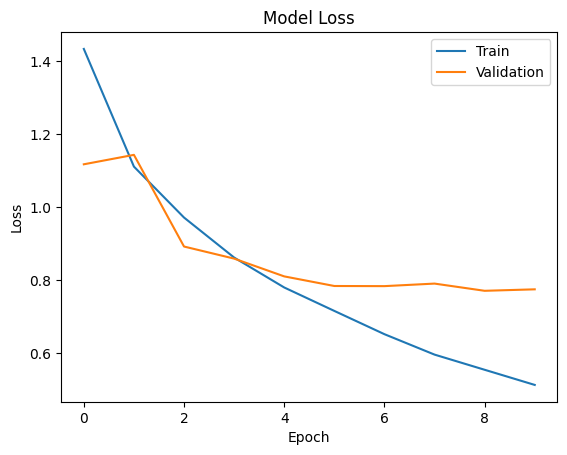

In [103]:
# Let's build model 13
model_13 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), use_bias=True),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', use_bias=True),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_13.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=0.5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_13 = model_13.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model_13.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy values
plt.plot(history_13.history['accuracy'])
plt.plot(history_13.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history_13.history['loss'])
plt.plot(history_13.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [104]:
model_13.summary()

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_150 (Conv2D)                  │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_119 (MaxPooling2D)     │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_151 (Conv2D)                  │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_120 (MaxPooling2D)     │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_55 (Flatten)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,321,760 (27.93 MB)

 Trainable params: 2,440,586 (9.31 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,881,174 (18.62 MB)

### So do some more experimentation on adding double convolutional layers

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.3841 - loss: 1.6804 - val_accuracy: 0.6012 - val_loss: 1.1224
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6170 - loss: 1.0781 - val_accuracy: 0.6967 - val_loss: 0.8651
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6897 - loss: 0.8705 - val_accuracy: 0.7235 - val_loss: 0.7998
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7361 - loss: 0.7547 - val_accuracy: 0.7473 - val_loss: 0.7300
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7646 - loss: 0.6719 - val_accuracy: 0.7477 - val_loss: 0.7236
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7885 - loss: 0.6032 - val_accuracy: 0.7585 - val_loss: 0.6959
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8044 - loss: 0.5537 - val_accuracy: 0.7666 - val_loss: 0.6800
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8218 - loss: 0.49

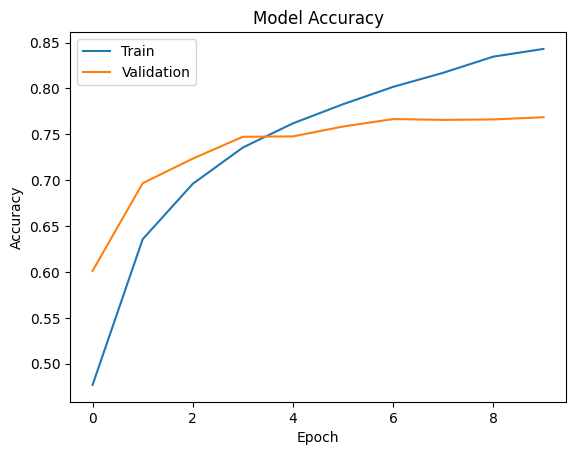

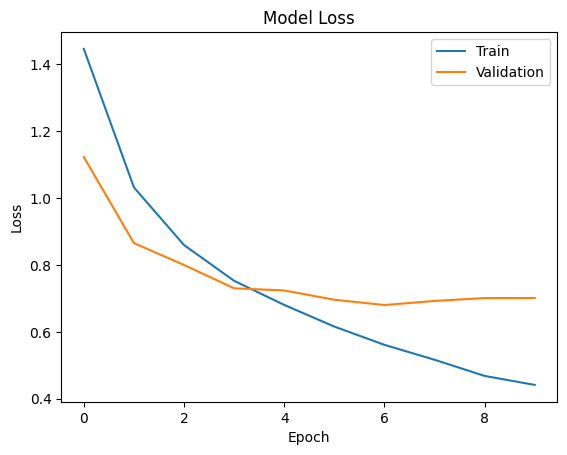

In [105]:
# Let's build model 14
model_14 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), use_bias=True),
    layers.Conv2D(64, (3, 3), activation='relu', use_bias=True),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', use_bias=True),
    layers.Conv2D(128, (3, 3), activation='relu', use_bias=True),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_14.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=0.5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_14 = model_14.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model_14.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy values
plt.plot(history_14.history['accuracy'])
plt.plot(history_14.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history_14.history['loss'])
plt.plot(history_14.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Wow that is the best model so far, seems like we are on the right track, what if added another pairing of similar layers and explore if that can increase our accuracy even more

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.3081 - loss: 1.8503 - val_accuracy: 0.4960 - val_loss: 1.3696
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.4877 - loss: 1.4065 - val_accuracy: 0.5506 - val_loss: 1.2495
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5315 - loss: 1.2984 - val_accuracy: 0.5887 - val_loss: 1.1352
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5603 - loss: 1.2215 - val_accuracy: 0.5759 - val_loss: 1.2071
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5817 - loss: 1.1736 - val_accuracy: 0.6525 - val_loss: 1.0207
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5935 - loss: 1.1353 - val_accuracy: 0.6096 - val_loss: 1.0959
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6090 - loss: 1.0923 - val_accuracy: 0.6362 - val_loss: 1.0218
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6139 - loss: 1.073

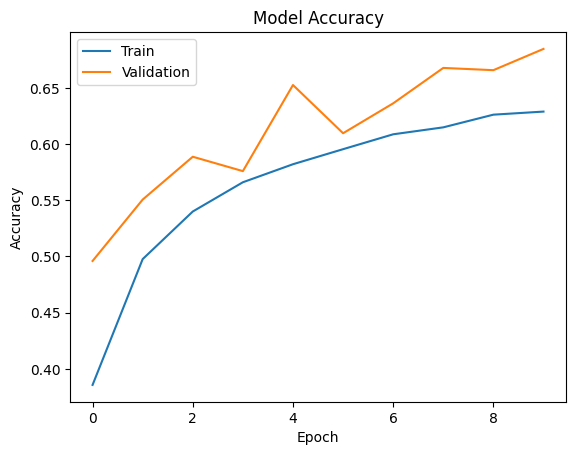

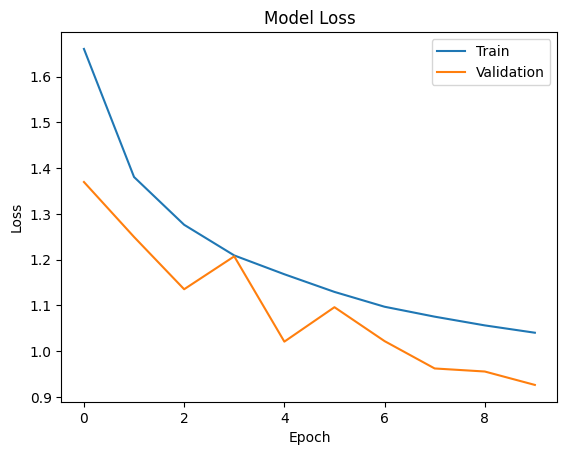

In [106]:
# Let's build model 15
model_15 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), use_bias=True),
    layers.Conv2D(32, (3, 3), activation='relu', use_bias=True),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Conv2D(64, (3, 3), activation='relu', use_bias=True),
    layers.Conv2D(64, (3, 3), activation='relu', use_bias=True),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_15.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=0.5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_15 = model_15.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model_15.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy values
plt.plot(history_15.history['accuracy'])
plt.plot(history_15.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history_15.history['loss'])
plt.plot(history_15.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [107]:
model_15.summary()

Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_156 (Conv2D)                  │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_157 (Conv2D)                  │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_123 (MaxPooling2D)     │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_158 (Conv2D)                  │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_159 (Conv2D)                  │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_124 (MaxPooling2D)     │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_57 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_47 (Dropout)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_114 (Dense)                    │ (None, 512)                 │         819,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,671,232 (10.19 MB)

 Trainable params: 890,410 (3.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,780,822 (6.79 MB)

### We could not add additional layers because that would mess up our shapes, so we addedd additional dropout layers, but as we can reulsts did not improve, we will update the kernel_initializer and padding to see how that impacts the model

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3758 - loss: 1.6973 - val_accuracy: 0.6007 - val_loss: 1.1270
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5941 - loss: 1.1346 - val_accuracy: 0.6410 - val_loss: 0.9959
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6692 - loss: 0.9388 - val_accuracy: 0.7059 - val_loss: 0.8445
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7087 - loss: 0.8334 - val_accuracy: 0.7235 - val_loss: 0.8047
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7397 - loss: 0.7405 - val_accuracy: 0.7450 - val_loss: 0.7419
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7600 - loss: 0.6781 - val_accuracy: 0.7498 - val_loss: 0.7296
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7815 - loss: 0.6249 - val_accuracy: 0.7614 - val_loss: 0.7030
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7920 - loss: 0.5

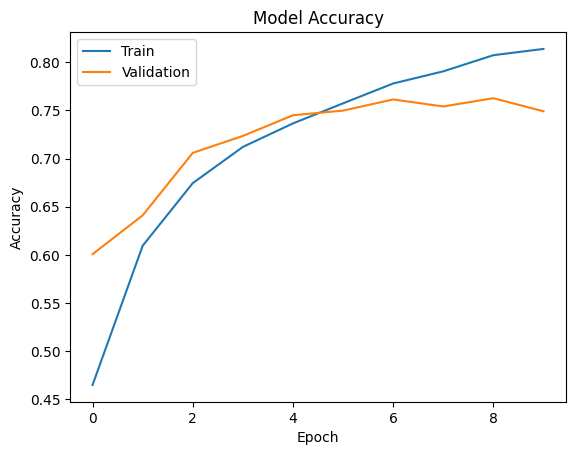

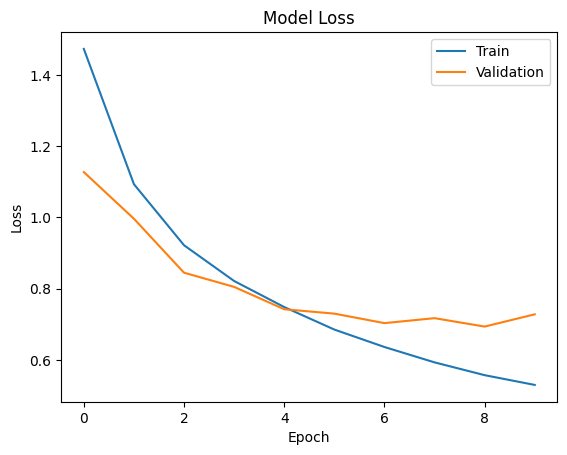

In [108]:
# Let's build model 16
model_16 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), use_bias=True, kernel_initializer='he_uniform'),
    layers.Conv2D(32, (3, 3), activation='relu', use_bias=True, kernel_initializer='he_uniform'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', use_bias=True, kernel_initializer='he_uniform'),
    layers.Conv2D(64, (3, 3), activation='relu', use_bias=True, kernel_initializer='he_uniform'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_16.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=0.5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_16 = model_16.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model_16.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy values
plt.plot(history_16.history['accuracy'])
plt.plot(history_16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history_16.history['loss'])
plt.plot(history_16.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### looks like very similar results, let's add the padding and see how does that work

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.4069 - loss: 1.6421 - val_accuracy: 0.6321 - val_loss: 1.0338
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.6398 - loss: 1.0198 - val_accuracy: 0.6902 - val_loss: 0.8662
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7216 - loss: 0.8010 - val_accuracy: 0.7157 - val_loss: 0.8230
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7606 - loss: 0.6788 - val_accuracy: 0.7319 - val_loss: 0.7614
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7939 - loss: 0.5913 - val_accuracy: 0.7502 - val_loss: 0.7196
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8178 - loss: 0.5110 - val_accuracy: 0.7621 - val_loss: 0.7071
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8408 - loss: 0.4501 - val_accuracy: 0.7659 - val_loss: 0.7021
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8631 - loss: 0.38

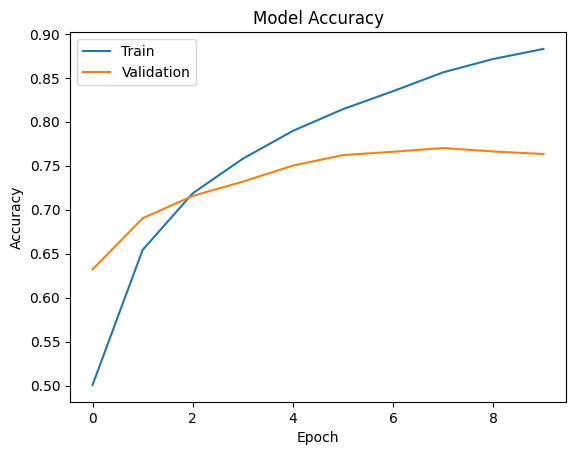

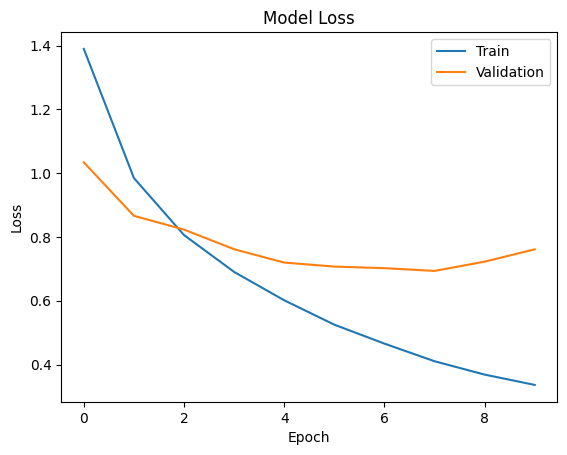

In [109]:
# Let's build model 17
model_17 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), use_bias=True, kernel_initializer='he_uniform', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', use_bias=True, kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', use_bias=True, kernel_initializer='he_uniform', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', use_bias=True, kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_17.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=0.5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_17 = model_17.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model_17.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy values
plt.plot(history_17.history['accuracy'])
plt.plot(history_17.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history_17.history['loss'])
plt.plot(history_17.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Ok let's add kernel regulizer and see how does that impact our model

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.3955 - loss: 2.3335 - val_accuracy: 0.6288 - val_loss: 1.4509
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.6129 - loss: 1.4981 - val_accuracy: 0.6682 - val_loss: 1.3226
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6591 - loss: 1.3530 - val_accuracy: 0.6976 - val_loss: 1.2376
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6892 - loss: 1.2690 - val_accuracy: 0.7222 - val_loss: 1.1745
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7048 - loss: 1.2212 - val_accuracy: 0.7367 - val_loss: 1.1422
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7193 - loss: 1.1736 - val_accuracy: 0.7511 - val_loss: 1.0957
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7332 - loss: 1.1340 - val_accuracy: 0.7410 - val_loss: 1.1070
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7396 - loss: 1.117

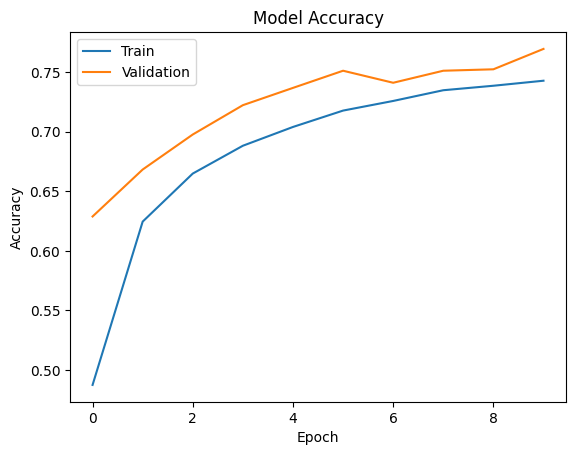

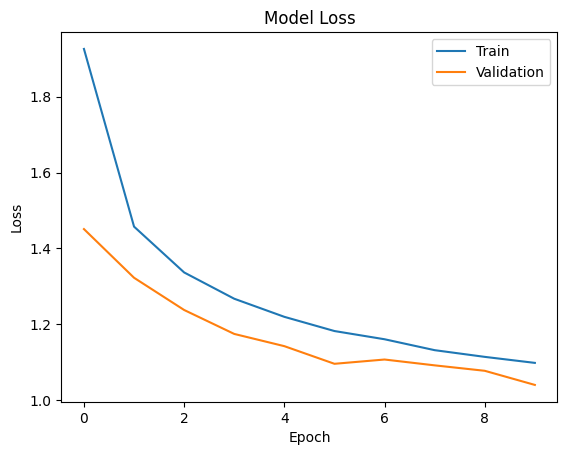

In [110]:
from keras import regularizers

# Let's build model 18
model_18 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), use_bias=True, kernel_initializer='he_uniform', padding='same', kernel_regularizer=regularizers.L2(0.001)),
    layers.Conv2D(32, (3, 3), activation='relu', use_bias=True, kernel_initializer='he_uniform', padding='same', kernel_regularizer=regularizers.L2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', use_bias=True, kernel_initializer='he_uniform', padding='same', kernel_regularizer=regularizers.L2(0.001)),
    layers.Conv2D(64, (3, 3), activation='relu', use_bias=True, kernel_initializer='he_uniform', padding='same', kernel_regularizer=regularizers.L2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.L2(0.001)),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_18.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=0.5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_18 = model_18.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model_18.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy values
plt.plot(history_18.history['accuracy'])
plt.plot(history_18.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history_18.history['loss'])
plt.plot(history_18.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### another technique we could try is to use batch normalization, which means Batch normalization is a method used to make training of artificial neural networks faster and more stable through normalization of the layers' inputs by re-centering and re-scaling

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4543 - loss: 3.0274 - val_accuracy: 0.5549 - val_loss: 2.1876
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6518 - loss: 1.8384 - val_accuracy: 0.6996 - val_loss: 1.6884
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7015 - loss: 1.6838 - val_accuracy: 0.6844 - val_loss: 1.6647
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7258 - loss: 1.5406 - val_accuracy: 0.7200 - val_loss: 1.5391
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7392 - loss: 1.4666 - val_accuracy: 0.7442 - val_loss: 1.4288
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7546 - loss: 1.3969 - val_accuracy: 0.7430 - val_loss: 1.4095
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7665 - loss: 1.3358 - val_accuracy: 0.7313 - val_loss: 1.3780
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7738 - loss: 1.257

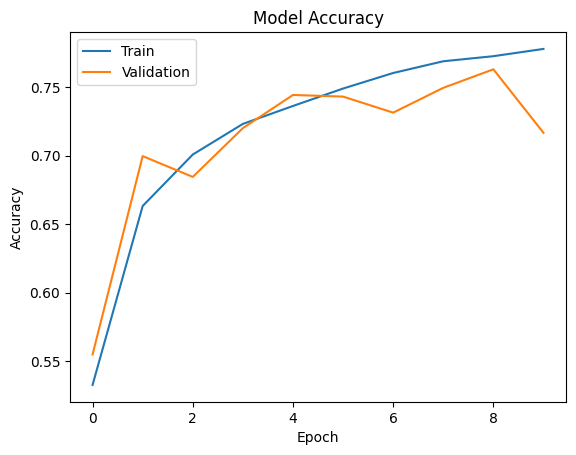

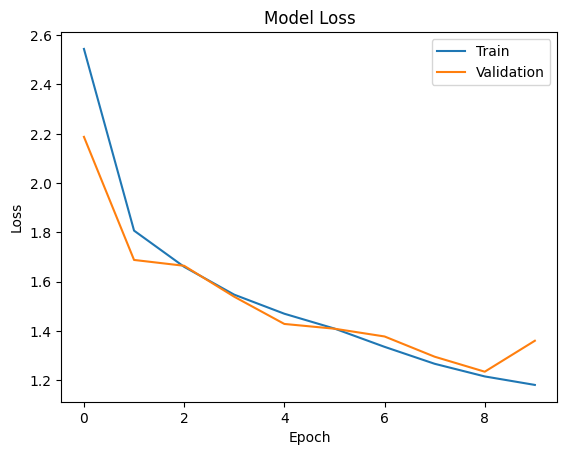

In [111]:
from keras import regularizers

# Let's build model 19
model_19 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), use_bias=True, kernel_initializer='he_uniform', padding='same', kernel_regularizer=regularizers.L2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', use_bias=True, kernel_initializer='he_uniform', padding='same', kernel_regularizer=regularizers.L2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', use_bias=True, kernel_initializer='he_uniform', padding='same', kernel_regularizer=regularizers.L2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', use_bias=True, kernel_initializer='he_uniform', padding='same', kernel_regularizer=regularizers.L2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.L2(0.001)),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_19.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=0.5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_19 = model_19.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model_19.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy values
plt.plot(history_19.history['accuracy'])
plt.plot(history_19.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history_19.history['loss'])
plt.plot(history_19.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.3498 - loss: 1.9901 - val_accuracy: 0.5772 - val_loss: 1.1788
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.5922 - loss: 1.1479 - val_accuracy: 0.6733 - val_loss: 0.9279
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6739 - loss: 0.9335 - val_accuracy: 0.7402 - val_loss: 0.7542
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7190 - loss: 0.8160 - val_accuracy: 0.7683 - val_loss: 0.6573
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7516 - loss: 0.7270 - val_accuracy: 0.7794 - val_loss: 0.6288
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7715 - loss: 0.6661 - val_accuracy: 0.7458 - val_loss: 0.7301
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7875 - loss: 0.6223 - val_accuracy: 0.8142 - val_loss: 0.5322
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8053 - loss: 0

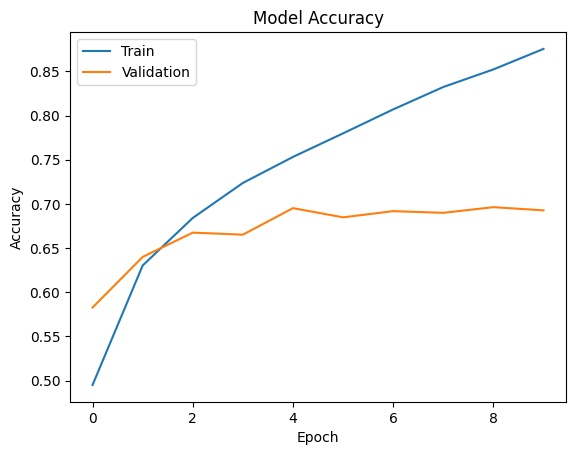

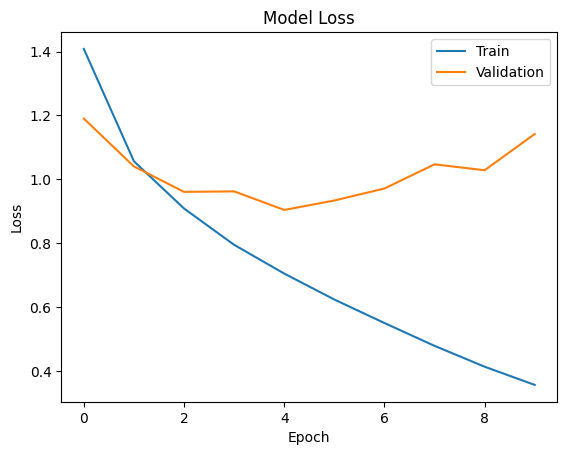

In [112]:
from keras import regularizers

# Let's build model 20
model_20 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax'),
])

# Compile the model
model_20.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=0.5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_20 = model_20.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model_20.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [113]:
# Amazing, up to 83% accuracy, so looks like the best step was, not to use batch normalization or dropout by itself, but to pair the two together to achieve the best results, let's explore the model summary
model_20.summary()

Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_176 (Conv2D)                  │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_177 (Conv2D)                  │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_133 (MaxPooling2D)     │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_178 (Conv2D)                  │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_179 (Conv2D)                  │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_134 (MaxPooling2D)     │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_53 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_180 (Conv2D)                  │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_181 (Conv2D)                  │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_135 (MaxPooling2D)     │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_54 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,656,320 (6.32 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

 Optimizer params: 1,103,446 (4.21 MB)

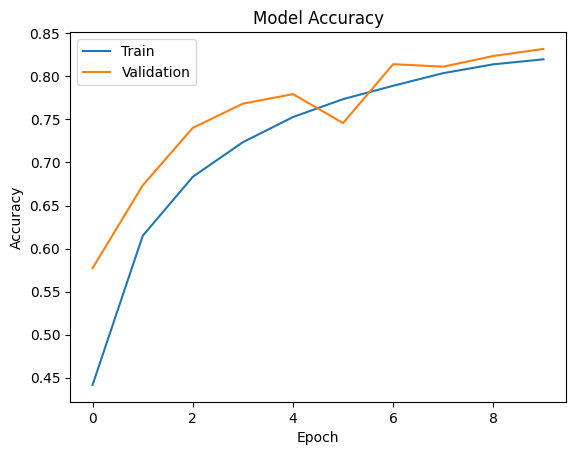

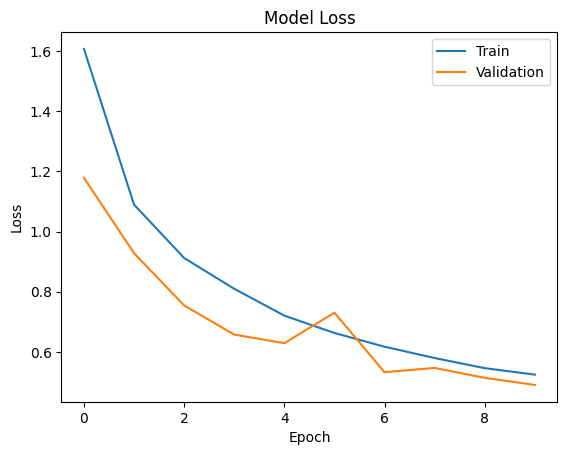

In [114]:
# I have just noticed that above graphs shows old model data, let's re-build the graphs and explore how the latest model 20 looks like
plt.plot(history_20.history['accuracy'])
plt.plot(history_20.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history_20.history['loss'])
plt.plot(history_20.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### An important lesson to learn in data exploration and deep learning model building, is try and change various paprameters to see how the model can be improved to achieve much better results